In [54]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import sys

In [55]:
#On s'assure qu'on utilise bien la version 2.0 de tensorflow : 
assert hasattr(tf, "function")

In [56]:

from sklearn.preprocessing import StandardScaler

# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)
images_test = scaler.transform(images_test)

print(images.shape)
print(targets.shape)

(10000, 784)
(10000,)


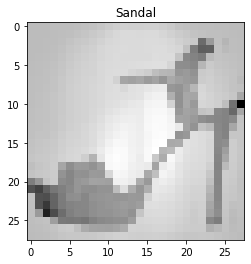

In [57]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]

#On affiche un exemple d'image
plt.imshow(np.reshape(images[9], (28, 28)), cmap="binary")
plt.title(targets_names[targets[9]])
plt.show()

In [58]:
print("First line of the image", images[9][0])
print("Associated target", targets[9])


First line of the image -0.0142697062475628
Associated target 5


In [60]:
#On va d'abord transformer l'image en un vecteur de 28*28 valeurs : 
model = tf.keras.models.Sequential()

print("Shape of the image", images[0:1].shape)
model_output = model.predict(images[0:1])
print("Shape of the image", model_output.shape)

Shape of the image (1, 784)
Shape of the image (1, 784)


In [62]:
#On ajoute les layers : 

model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Dense(256, activation = "relu"))
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.1311033  0.16113265 0.3030888  0.06470967 0.09243726 0.0396831
  0.07304034 0.10201249 0.01154662 0.02124572]] [9]


In [63]:
#Résumé du modèle : 
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             multiple                  200960    
_________________________________________________________________
dense_35 (Dense)             multiple                  32896     
_________________________________________________________________
dense_36 (Dense)             multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.compile(
loss = "sparse_categorical_crossentropy",
optimizer = "sgd",
metrics = ["accuracy"],
)

In [65]:
history = model.fit(images, targets, epochs = 10)

Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 1s 92us/sample - loss: 0.8031 - accuracy: 0.7271
Epoch 2/10
10000/10000 [==============================] - 1s 54us/sample - loss: 0.4938 - accuracy: 0.8255
Epoch 3/10
10000/10000 [==============================] - 1s 55us/sample - loss: 0.4230 - accuracy: 0.8513
Epoch 4/10
10000/10000 [==============================] - 1s 56us/sample - loss: 0.3803 - accuracy: 0.8658
Epoch 5/10
10000/10000 [==============================] - 1s 58us/sample - loss: 0.3508 - accuracy: 0.8783
Epoch 6/10
10000/10000 [==============================] - 1s 56us/sample - loss: 0.3255 - accuracy: 0.8868
Epoch 7/10
10000/10000 [==============================] - 1s 55us/sample - loss: 0.3045 - accuracy: 0.8958
Epoch 8/10
10000/10000 [==============================] - 1s 59us/sample - loss: 0.2874 - accuracy: 0.9021
Epoch 9/10
10000/10000 [==============================] - 1s 65us/sample - loss: 0.2693 - accuracy: 0.9086
Epoch 10/10
10